In [1]:
import pandas as pd
import numpy as np
heartdis=pd.read_csv('heartdisease.csv')

In [2]:
heartdis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


### Observed:

In [3]:
heartdis.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg       int64
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
predicted     int64
dtype: object

### Observed:

In [4]:
#Replacing '?' with null value
heart=heartdis.replace('?',np.nan)

In [5]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0
199,62,1,2,120,254,0,2,93,1,0,NaN,NaN,NaN,1


### Observed:

In [6]:
# Let us replace NaN values with most_frequent
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
list1=['chol','fbs','exang','oldpeak','slope','ca','thal','trestbps','thalach']
for val in list1:
    heart[val]=imp.fit_transform(heart[val].values.reshape(-1,1))

In [7]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
195,54,0,4,127,333,1,1,154,0,0,2,0,7,1
196,62,1,1,120,139,0,1,120,1,0,2,0,7,0
197,55,1,4,122,223,1,1,100,0,0,2,0,6,2
198,58,1,4,120,385,1,2,120,1,0,2,0,7,0
199,62,1,2,120,254,0,2,93,1,0,2,0,7,1


In [8]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg       int64
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
predicted     int64
dtype: object

In [9]:
# let us convert object type to float type
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['trestbps','chol','fbs','thalach','exang','oldpeak','slope','ca','thal']
for val in list1:
    heart[val]=le.fit_transform(heart[val].astype(float))

In [10]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
195,54,0,4,16,91,1,1,50,0,1,1,0,2,1
196,62,1,1,11,2,0,1,26,1,1,1,0,2,0
197,55,1,4,12,40,1,1,12,0,1,1,0,1,2
198,58,1,4,11,97,1,2,26,1,1,1,0,2,0
199,62,1,2,11,59,0,2,6,1,1,1,0,2,1


In [11]:
heart.dtypes

age          int64
sex          int64
cp           int64
trestbps     int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak      int64
slope        int64
ca           int64
thal         int64
predicted    int64
dtype: object

In [12]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,17.160000,34.190000,0.340000,0.735000,27.895000,0.740000,4.290000,1.065000,0.0,1.920000,1.520000
std,7.811697,0.171015,0.795701,9.008896,30.734131,0.474898,0.683455,13.081268,0.439735,3.867907,0.471046,0.0,0.337892,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,55.000000,1.000000,3.000000,11.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,0.0,2.000000,0.000000
50%,60.000000,1.000000,4.000000,12.500000,32.000000,0.000000,1.000000,26.000000,1.000000,2.000000,1.000000,0.0,2.000000,1.000000
75%,64.000000,1.000000,4.000000,24.000000,59.250000,1.000000,1.000000,36.000000,1.000000,9.000000,1.000000,0.0,2.000000,3.000000
max,77.000000,1.000000,4.000000,39.000000,98.000000,1.000000,2.000000,58.000000,1.000000,13.000000,2.000000,0.0,2.000000,4.000000


### Observed:

In [13]:
heart.ca.unique()

array([0], dtype=int64)

### Observed:

In [14]:
heart=heart.drop(['ca'],axis=1)

In [15]:
for column in heart.columns:
    print(f"{column}: Number of unique values {heart[column].nunique()}")
    print('------------------------------------------------------------')

age: Number of unique values 39
------------------------------------------------------------
sex: Number of unique values 2
------------------------------------------------------------
cp: Number of unique values 4
------------------------------------------------------------
trestbps: Number of unique values 40
------------------------------------------------------------
chol: Number of unique values 99
------------------------------------------------------------
fbs: Number of unique values 2
------------------------------------------------------------
restecg: Number of unique values 3
------------------------------------------------------------
thalach: Number of unique values 59
------------------------------------------------------------
exang: Number of unique values 2
------------------------------------------------------------
oldpeak: Number of unique values 14
------------------------------------------------------------
slope: Number of unique values 3
-----------------------

In [16]:
heart.predicted.unique()

array([2, 0, 1, 3, 4], dtype=int64)

#### Observed:

## Checking for missing values

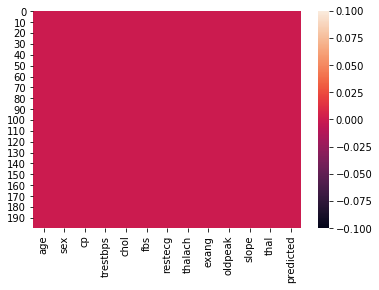

In [17]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(heart.isnull())
plt.show()

#### Observed:

## To Check the correlation

In [18]:
heart1=heart.corr()
heart1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,predicted
age,1.000000,0.034230,-0.038280,0.176142,0.049327,0.135728,0.002400,-0.139150,0.129027,0.127013,0.107135,0.092525,0.287289
sex,0.034230,1.000000,0.038036,-0.013177,-0.162399,-0.059400,0.060621,0.003077,0.029402,0.066397,0.086709,-0.041742,0.147470
cp,-0.038280,0.038036,1.000000,0.156914,0.078455,-0.044416,0.034790,-0.088056,0.089904,0.182395,0.059460,-0.017195,0.168210
trestbps,0.176142,-0.013177,0.156914,1.000000,0.086896,0.150485,0.030589,0.110412,0.039729,0.323426,0.095823,0.002575,0.203716
chol,0.049327,-0.162399,0.078455,0.086896,1.000000,0.146351,-0.024385,-0.009424,0.124144,-0.027097,0.037671,-0.059983,0.114671
fbs,0.135728,-0.059400,-0.044416,0.150485,0.146351,1.000000,0.170616,0.028425,-0.176144,-0.141491,-0.009435,-0.080170,0.048940
restecg,0.002400,0.060621,0.034790,0.030589,-0.024385,0.170616,1.000000,-0.000880,-0.063203,-0.126657,-0.039881,-0.005222,-0.032800
thalach,-0.139150,0.003077,-0.088056,0.110412,-0.009424,0.028425,-0.000880,1.000000,-0.093002,0.157128,-0.084516,-0.223604,-0.062714
exang,0.129027,0.029402,0.089904,0.039729,0.124144,-0.176144,-0.063203,-0.093002,1.000000,0.085916,0.106259,0.197511,0.206541
oldpeak,0.127013,0.066397,0.182395,0.323426,-0.027097,-0.141491,-0.126657,0.157128,0.085916,1.000000,0.276443,0.083205,0.373783


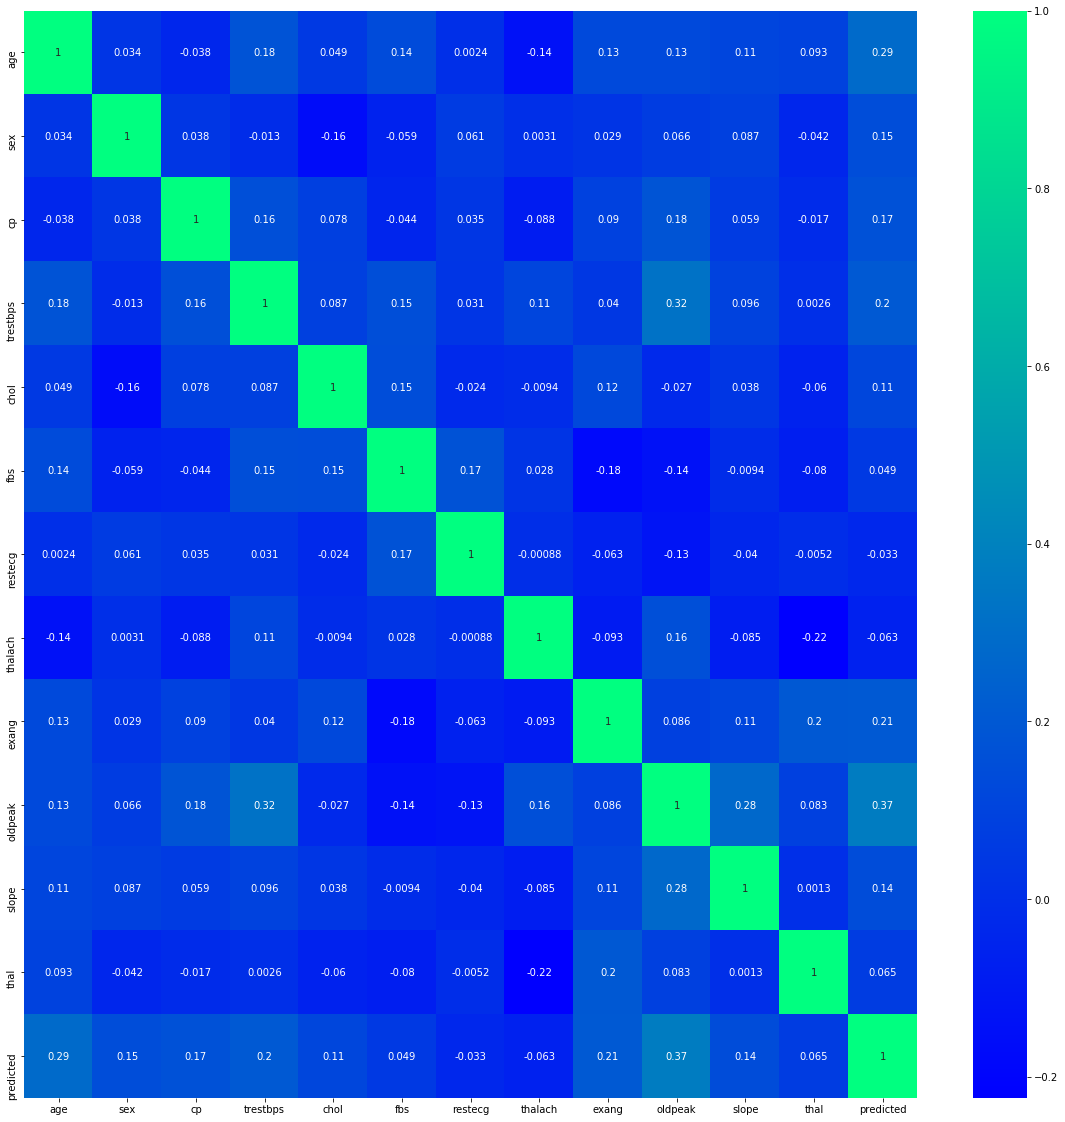

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(heart1,annot=True,cmap='winter')

### Observed:

In [20]:
heart=heart.drop(['thalach','thal','restecg'],axis=1)

## Data Visualization

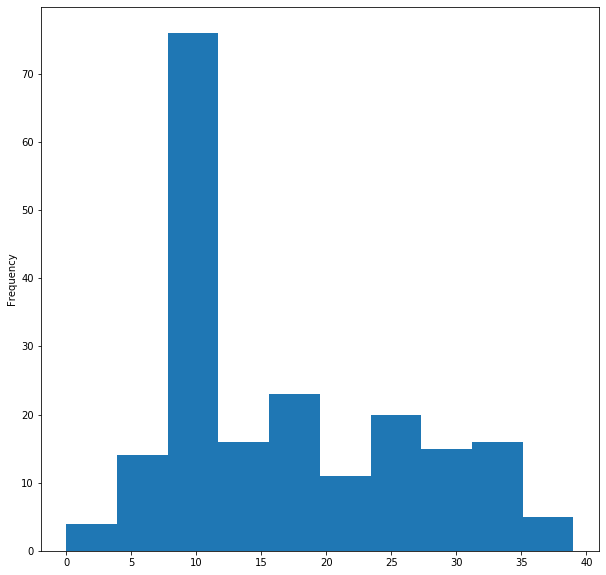

In [21]:
plt.figure(figsize=(10,10))
heart['trestbps'].plot.hist()
plt.show()

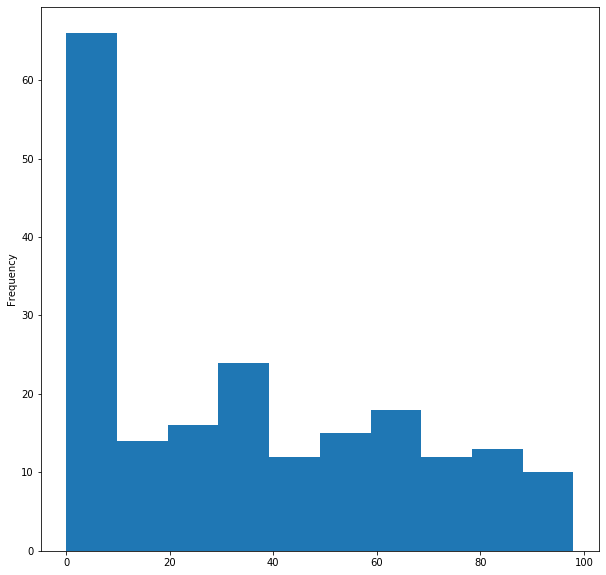

In [22]:
plt.figure(figsize=(10,10))
heart['chol'].plot.hist()
plt.show()

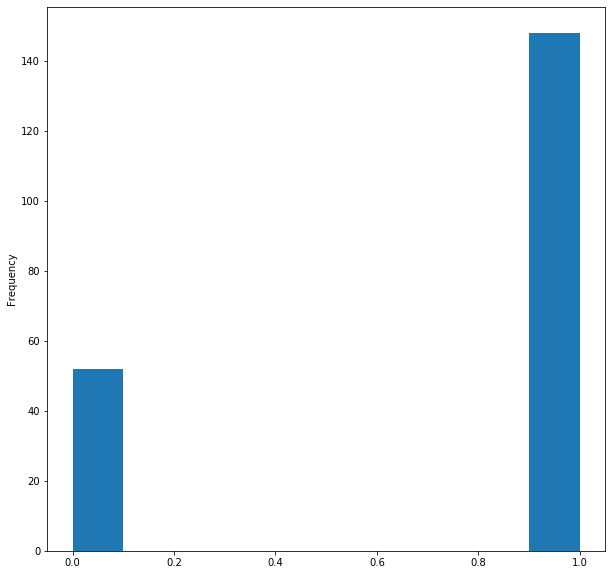

In [23]:
plt.figure(figsize=(10,10))
heart['exang'].plot.hist()
plt.show()

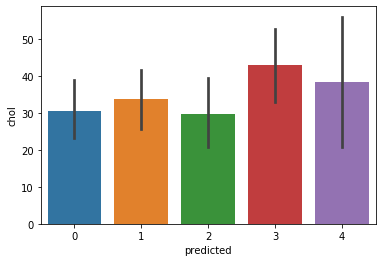

In [24]:
sns.barplot(x='predicted',y='chol',data=heart)
plt.show()

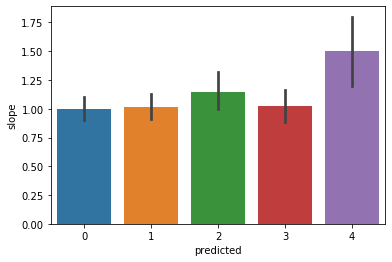

In [25]:
sns.barplot(x='predicted',y='slope',data=heart)
plt.show()

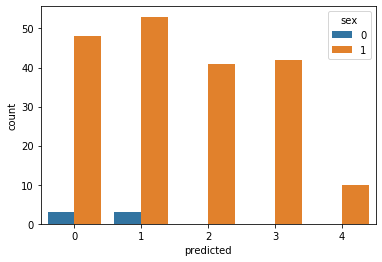

In [26]:
sns.countplot(x='predicted',hue='sex',data=heart)
plt.show()

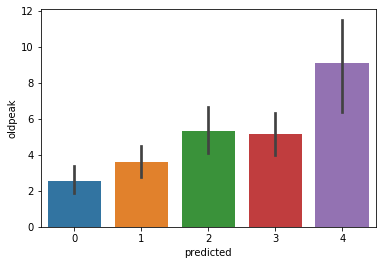

In [27]:
sns.barplot(x='predicted',y='oldpeak',data=heart)
plt.show()

In [28]:
heart.skew()

age         -0.404091
sex         -5.552105
cp          -1.648734
trestbps     0.673163
chol         0.413457
fbs          0.680636
exang       -1.102593
oldpeak      0.693752
slope        0.210521
predicted    0.297393
dtype: float64

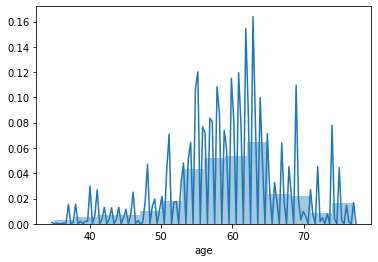

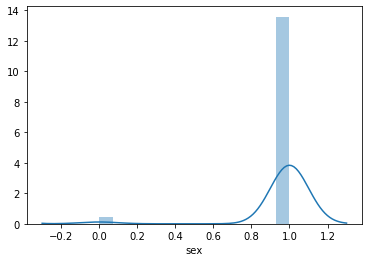

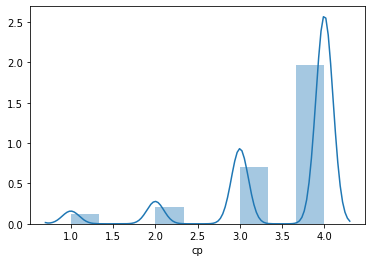

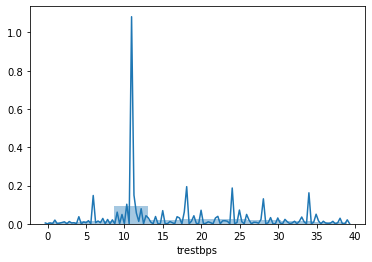

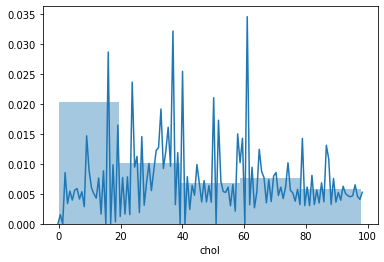

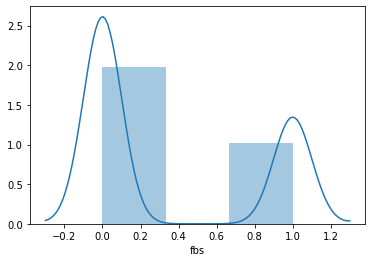

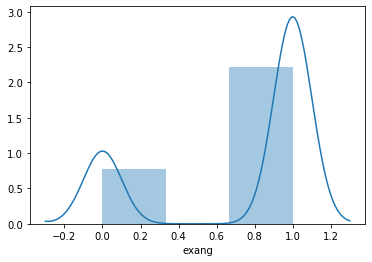

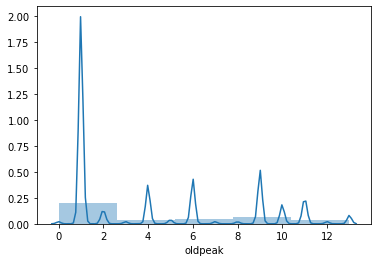

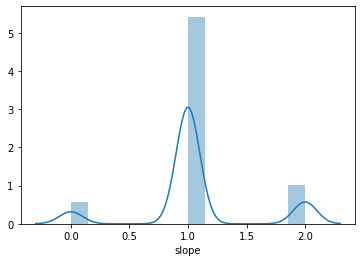

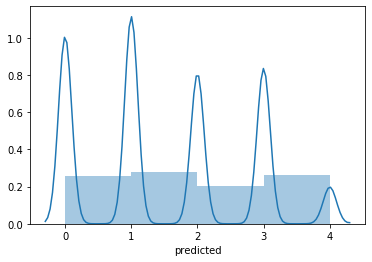

In [29]:
collist=heart.columns.values
ncol=15
nrow=10
for i in heart.columns:
    sns.distplot(heart[i],kde_kws={'bw':0.1})
    plt.show()

## Checking Outliers

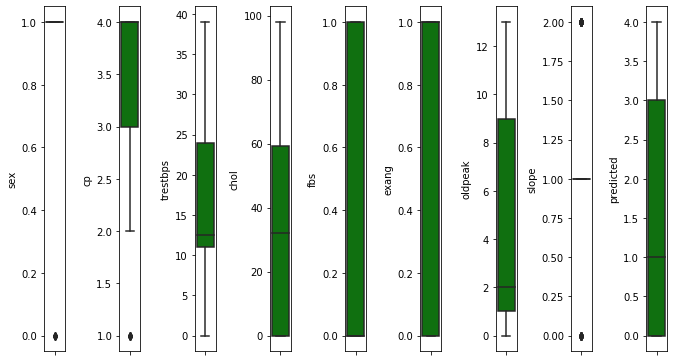

In [30]:
#let us check outliers for all columns
col=heart.columns.values
ncol=10
nrow=10
plt.figure(figsize=(ncol,5*ncol))
for i in  range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(heart[col[i]],color='green',orient='v')
    plt.tight_layout()

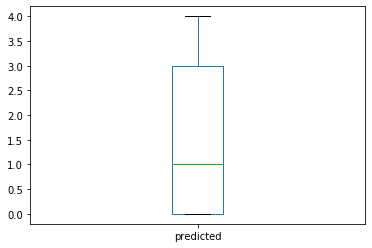

In [31]:
heart['predicted'].plot.box()

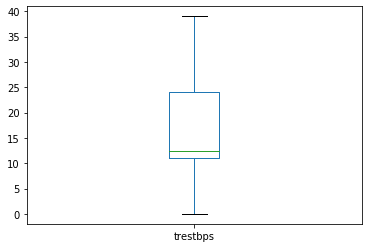

In [32]:
heart['trestbps'].plot.box()

### Observed:

## Removing Outliers

In [33]:
#Removing outliers
from scipy.stats import zscore
z_score=abs(zscore(heart))
print(heart.shape)
heartdis=heart.loc[(z_score<3).all(axis=1)]
print(heartdis.shape)

(200, 10)
(185, 10)


### Observed:

In [34]:
heartdis.skew()

age         -0.316167
sex          0.000000
cp          -1.368017
trestbps     0.663773
chol         0.458334
fbs          0.730312
exang       -1.139191
oldpeak      0.657105
slope        0.242120
predicted    0.267222
dtype: float64

In [35]:
df_x=heartdis.drop(['predicted'],axis=1)

In [36]:
df_x.head()

,age,sex,cp,trestbps,chol,fbs,exang,oldpeak,slope
0,63,1,4,24,62,0,1,11,1
1,44,1,4,18,28,0,0,1,1
2,60,1,4,19,35,0,1,6,2
3,55,1,4,25,45,0,1,10,0
4,66,1,3,6,31,1,1,5,1


In [37]:
y=pd.DataFrame(heartdis['predicted'])

In [38]:
y.head()

,predicted
0,2
1,0
2,2
3,1
4,0


In [39]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [40]:
x.shape

(185, 9)

In [41]:
y.shape

(185, 1)

In [42]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

### GridSearchCV

In [43]:
from sklearn import svm
svc=svm.SVC()
parameters={'kernel':['linear','rbf','poly'],'C':[1.0]}
gd=GridSearchCV(svc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'C': 1.0, 'kernel': 'rbf'}


In [44]:
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy']}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'criterion': 'entropy'}


#### Training our model with corss_val_score so that they won't overfit or underfit

In [45]:
from sklearn.model_selection import cross_val_score
model=[DecisionTreeClassifier(criterion='gini'),KNeighborsClassifier(),SVC(kernel='rbf'),RandomForestClassifier(),AdaBoostClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Score of',m,'is:',score)
    print('Mean score:',score.mean())
    print('Standard deviation:',score.std())
    print('*******************************************************************************************************')
    print('\n')

Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: [0.2972973  0.21621622 0.2972973  0.18918919 0.35135135]
Mean score: 0.2702702702702703
Standard deviation: 0.059213249460017964
*******************************************************************************************************


Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is: [0.2972973  0.27027027 0.2972973  0.24324324 0.48648649]
Mean score: 0.31891891891891894
Standard deviation: 0.08614798621896

### Observed:

#### Predicting best accuracy score

In [46]:
max_accuracy_score=0
for r_state in range (40,180):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    model=[DecisionTreeClassifier(criterion='gini'),KNeighborsClassifier(),SVC(kernel='rbf'),RandomForestClassifier(),AdaBoostClassifier()]
    for m in model:
        m.fit(x_train,y_train)
        y_pred=m.predict(x_test)
        r_scr=accuracy_score(y_test,y_pred)
        if r_scr>max_accuracy_score:
            max_accuracy_score=r_scr
            final_r_state=r_state
print("max accuracy score corresponding to ",final_r_state,"is",max_accuracy_score)        

max accuracy score corresponding to  118 is 0.5675675675675675


#### Observed:

### Predicting the best model

In [49]:
model=[DecisionTreeClassifier(criterion='gini'),KNeighborsClassifier(),SVC(kernel='rbf'),RandomForestClassifier(),AdaBoostClassifier()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94,test_size=.20)
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Score:')
    print('accuracy_score :',accuracy_score(y_test,predm))
    print('confusion_matrix :',confusion_matrix(y_test,predm))
    print('classification_report',classification_report(y_test,predm))
    print('*******************************************************************************************************')
    print('\n')

Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 0.9932432432432432
Score:
accuracy_score : 0.35135135135135137
confusion_matrix : [[4 3 1 3 0]
 [2 5 2 0 0]
 [2 2 2 1 2]
 [3 1 1 1 1]
 [0 0 0 0 1]]
classification_report               precision    recall  f1-score   support

           0       0.36      0.36      0.36        11
           1       0.45      0.56      0.50         9
           2       0.33      0.22      0.27         9
           3       0.20      0.14      0.17         7
           4       0.25      1.00      0.40         1

    accuracy                           0.35        37
   macro a

### Observed:

### Saving the best model

In [50]:
#RandomForestClassifier is best model among all models
import joblib
joblib.dump(RandomForestClassifier,'heartdisease.pkl')

['heartdisease.pkl']

### Conclusion: